In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets #引入数据集
from sklearn.model_selection import train_test_split #将数据分为测试集和训练集

In [417]:
boston = datasets.load_boston()

X = boston.data[:] #使用一个特征，注意更改此处使用boston房价数据集的13个特征或其他特征测试效果
y = boston.target

In [411]:
print(boston.keys()) #查看健
print(boston.feature_names) #查看特征名称
print(boston.DESCR)#文件描述
print(boston.filename) #文件位置

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

In [418]:
data = boston
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
data_pd['price'] = data.target

In [419]:
data_pd.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

Text(0, 0.5, 'count')

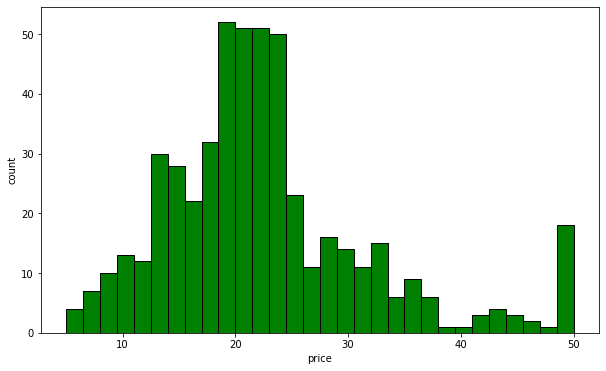

In [446]:
plt.figure(figsize=(10,6))
plt.hist(data_pd['price'], bins=30, ec='black', color='g')
plt.xlabel('price')
plt.ylabel('count')

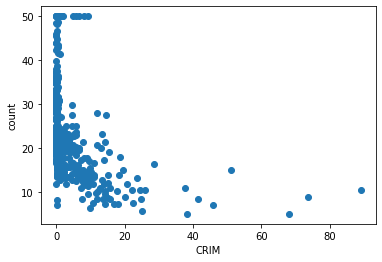

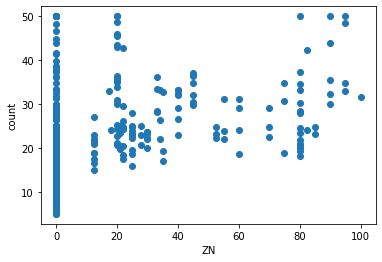

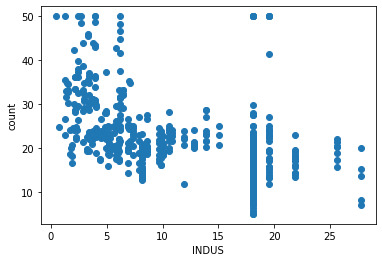

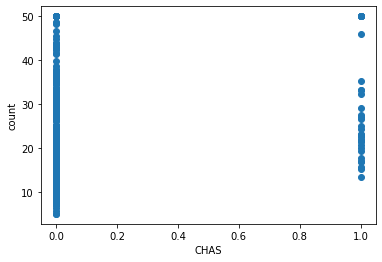

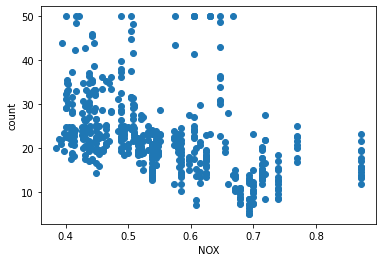

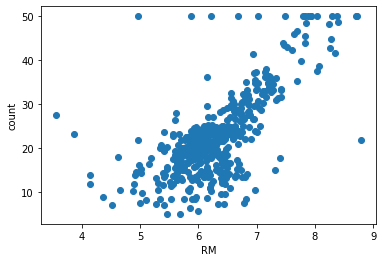

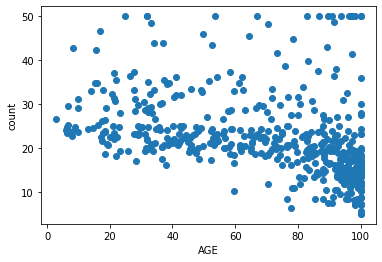

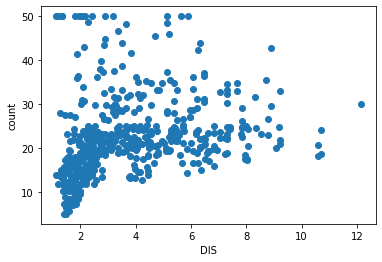

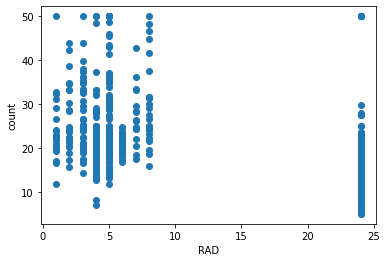

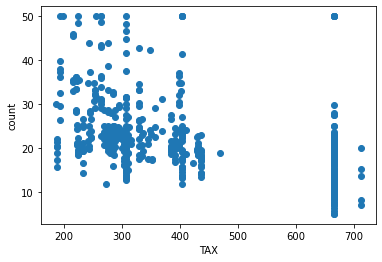

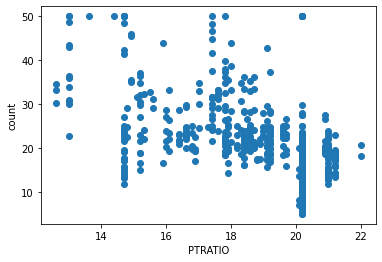

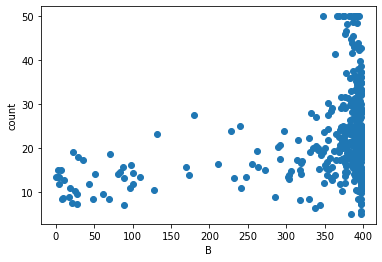

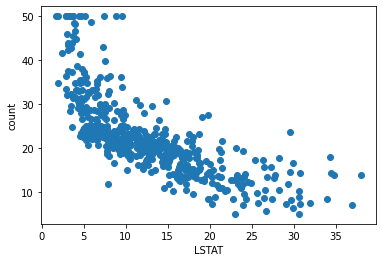

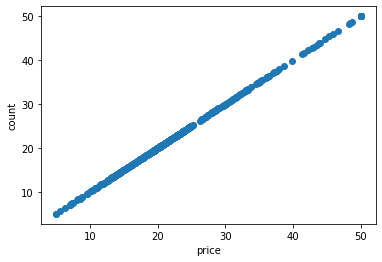

In [451]:
for i in data_pd.columns:
    plt.subplots(1,1)
    plt.scatter(data_pd[i], data_pd['price'])
    plt.xlabel(i)
    plt.ylabel('count')

In [54]:
data_pd.dtypes.value_counts() #数据类型和统计

float64    14
dtype: int64

In [55]:
data_pd.isnull().sum() #判断有无空值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [56]:
data_pd.shape #数据大小 506行 14列

(506, 14)

In [57]:
data_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [390]:
data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM：城镇人均犯罪率。

ZN：住宅用地超过 25000 sq.ft. 的比例。

INDUS：城镇非零售商用土地的比例。

CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。

NOX：一氧化氮浓度。

RM：住宅平均房间数。

AGE：1940 年之前建成的自用房屋比例。

DIS：到波士顿五个中心区域的加权距离。

RAD：辐射性公路的接近指数。

TAX：每 10000 美元的全值财产税率。

PTRATIO：城镇师生比例。

B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。

LSTAT：人口中地位低下者的比例。

price：自住房的平均房价，以千美元计。

In [59]:
data_pd.corr()['price'] #特征与结果的相关系数

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

<AxesSubplot:>

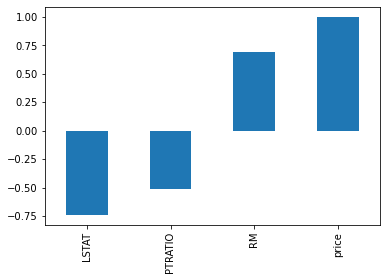

In [60]:
corr = data_pd.corr()
corr = corr['price']
corr[abs(corr)>0.5].sort_values().plot.bar() #相关系数大于0.5的特征柱状图 plot是pd的画图函数

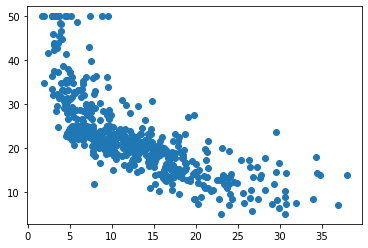

In [61]:
plt.scatter(data_pd['LSTAT'],data_pd['price'])

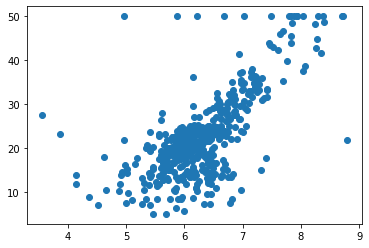

In [62]:
plt.scatter(data_pd['RM'],data_pd['price'])

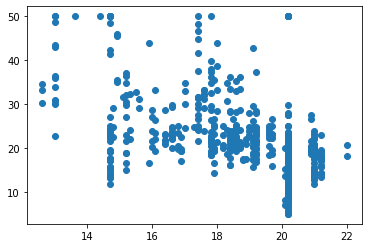

In [63]:
plt.scatter(data_pd['PTRATIO'],data_pd['price'])

In [381]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        """初始化"""
        self.coef_ = None #回顾系数
        self.intercept_ = None #截距
        self._theta = None
    
    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """
        训练模型
        
        eta:步长
        n_iters:训练轮数
        """
        assert X_train.shape[0] == y_train.shape[0], "Error,矩阵不等"
        
        def J(theta, X_b, y): #目标函数
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len (y)
            except:
                return float('inf') #无穷大的表示 -inf为无穷小
        
        def dJ(theta, X_b ,y):
            """目标函数的导函数,即为损失函数"""
            res = np.empty(len(theta))
            res[0] = np.sum(X_b.dot(theta) - y)
            for i in range(1, len(theta)):
                res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
            return res * 2 / len(X_b)
        
        
        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon = 1e-8):
            """梯度下降法"""
            theta = initial_theta
            cur_iter = 0
            err = []
            
            while cur_iter < n_iters :
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                #if cur_iter % 10 == 0:
                    #print("第%s次迭代:" % cur_iter, theta)
                err.append(np.mean(((X_b.dot(theta) - y) ** 2)))
                plt.xlabel('Iteration')
                plt.ylabel('Average error')
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                
                cur_iter += 1
                
            plt.plot(np.arange(0,len(err)), np.array(err))
            print(type(np.arange(0,len(err))))
            print(type(np.array(err)))
            return theta
        
        X_b = np.hstack([np.ones((len(X_train),1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        mms = MinMaxScaler()
        X_b_norm = mms.fit_transform(X_b)
        y_train_norm = (mms.fit_transform(y_train))
        y_train_norm = np.concatenate(y_train_norm, axis=0)
        self._theta = gradient_descent(X_b_norm, y_train_norm, initial_theta, eta, n_iters)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
        
    def predict(self, X_predict):
        """预测结果"""
        assert self.intercept_ is not None and self.coef_ is not None, "Error!系数为0"
        assert X_predict.shape[1] == len(self.coef_), "Error,系数不符"
        mms = MinMaxScaler()
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        X_b_norm = mms.fit_transform(X_b)
        return X_b_norm.dot(self._theta).reshape(-1,1) #此处应返回1列 因此需要调用reshape的方法
    
    def score(self, X_test, y_test):
        mms = MinMaxScaler()
        X_test_norm = mms.fit_transform(X_test)
        y_predict = self.predict(X_test_norm.reshape(-1,3))
        y_test_norm = mms.fit_transform(y_test.reshape(-1,1))
        return 1 - (np.sum((y_test_norm - y_predict)**2) / len(y_test_norm))/np.var(y_test_norm) #R方法求误差 1-MSE/方差
    
    def __repr__(self):
        return "机器学习LinearRegression"
    
            

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [383]:
reg = LinearRegression()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


机器学习LinearRegression

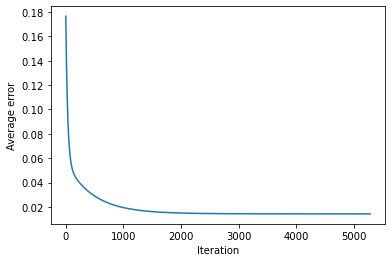

In [384]:
reg.fit(X_train.reshape(-1,3), y_train.reshape(-1,1)) #使用多个特征需要进行归一化 提升收敛的速度

In [293]:
reg.coef_

array([ 0.95569657, -0.07138836, -0.24720621])

In [294]:
reg.score(X_test, y_test)

0.6864249918478293